# Imports and inits

In [ ]:
import os
import numpy as np
import pandas as pd
import sqlite3
import json
from datetime import datetime, timedelta
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style("whitegrid")

drive.mount('/content/gdrive/', force_remount=True)
os.chdir("/content/gdrive/Shareddrives/ECS 260/final")

Mounted at /content/gdrive/


In [ ]:
# getting columns to analyze
with open('columns_to_analyze.txt', "r") as file:
  columns_to_analyze = file.read()
columns_to_analyze = json.loads(columns_to_analyze)
print(f"{len(columns_to_analyze)} columns to analyze:")
for i in range(len(columns_to_analyze)):
  column = columns_to_analyze[i]
  print(f"{i + 1} --> {column}")

31 columns to analyze:
1 --> no_of_versions
2 --> no_of_users
3 --> has_readme
4 --> has_homepage
5 --> is_deprecated
6 --> no_of_dependencies
7 --> lagging_dependencies_count
8 --> unpack_size
9 --> file_count
10 --> has_repository
11 --> rank
12 --> dependants_count
13 --> dependant_repos_count
14 --> forks
15 --> stars
16 --> watchers
17 --> issues
18 --> pr
19 --> contributors
20 --> no_of_commits
21 --> avg_commit_freq
22 --> total_lines_of_code
23 --> sloc
24 --> no_of_files
25 --> health_score
26 --> security_numeric
27 --> popularity_numeric
28 --> maintenance_numeric
29 --> community_numeric
30 --> avg_monthly_download
31 --> days_since_last_modification


In [ ]:
def get_df(query):
  conn = sqlite3.connect("final_database.db")
  cursor = conn.cursor()
  df = pd.read_sql_query(query, conn)
  conn.close()
  return df
def select_column(column):
  return f"SELECT {column} FROM package_data WHERE {column} IS NOT NULL"

In [ ]:
# function to format each value in regular notation
def format_values(value):
  if isinstance(value, (int, float)):
    return "{:,.2f}".format(value)
  return value

In [ ]:
def get_df_and_formatted_stats(column, as_int = False):
  df = get_df(select_column(column))
  if as_int:
    df = df.astype(int)
  formatted_stats = df.describe().apply(format_values)
  # display the formatted statistics
  print(formatted_stats)
  return df, formatted_stats

In [ ]:
def visualize_distribution(df, column, outliers_removed=False):
  print("----------------------------------------------------------------------------------------------")
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
  # plotting histogram
  sns.histplot(df, bins=30, kde=True, ax=axes[0])
  axes[0].set_title(f'Histogram of {column}' + ' (outliers removed)' if outliers_removed else '')
  axes[0].set_xlabel(f'{column}')
  axes[0].set_ylabel('Frequency')

  # plottin boxplot
  sns.boxplot(x=df, ax=axes[1])
  axes[1].set_title(f'Boxplot of {column}' + ' (outliers removed)' if outliers_removed else '')
  axes[1].set_xlabel(column)

  # plotting Q-Q plots
  stats.probplot(df, dist="norm", plot=axes[2])
  axes[2].set_title(f'Q-Q Plot of {column}' + ' (outliers removed)' if outliers_removed else '')

  # to ensures proper spacing between subplots
  plt.tight_layout()
  plt.show()

In [ ]:
def remove_outliers(df, column):
  # taking care of outliers
  z_scores = stats.zscore(df[column])
  # setting threshold for Z-score
  threshold = 2.7
  # Filtering out rows with Z-scores beyond the threshold
  return df[(abs(z_scores) < threshold)]

def visualize_column(df, column):
  print("Observing original distributions")
  visualize_distribution(df[column], column)
  print("\n\n")

  print("Observing log distributions")
  visualize_distribution(np.log(df[column]), column)
  print("\n\n")


  # taking care of outliers
  z_scores = stats.zscore(df[column])
  # setting threshold for Z-score
  threshold = 2.7
  # Filtering out rows with Z-scores beyond the threshold
  outliers_removed_df = remove_outliers(df, column)

  print("Observing original distributions after taking care of outliers")
  visualize_distribution(outliers_removed_df[column], column, outliers_removed=True)
  print("\n\n")

  print("Observing log distributions after taking care of outliers")
  visualize_distribution(np.log(outliers_removed_df[column]), column, outliers_removed=True)
  print("\n\n")

# Column analyses

###### Exploring column `rank`
Used

To be used for RQ3

> Source Rank: represents the dependability of a package, lower the #rank, more the trust




              rank
count  19743.00000
mean       6.34473
std        2.98405
min        0.00000
25%        4.00000
50%        6.00000
75%        8.00000
max       29.00000

Observing original distributions
----------------------------------------------------------------------------------------------


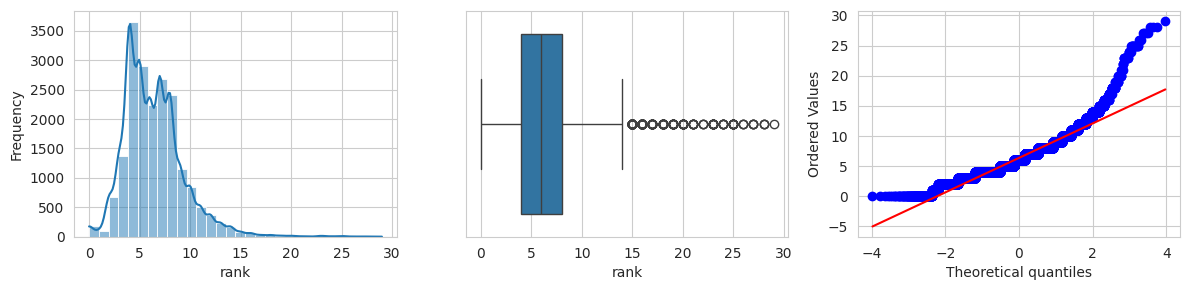




Observing log distributions
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


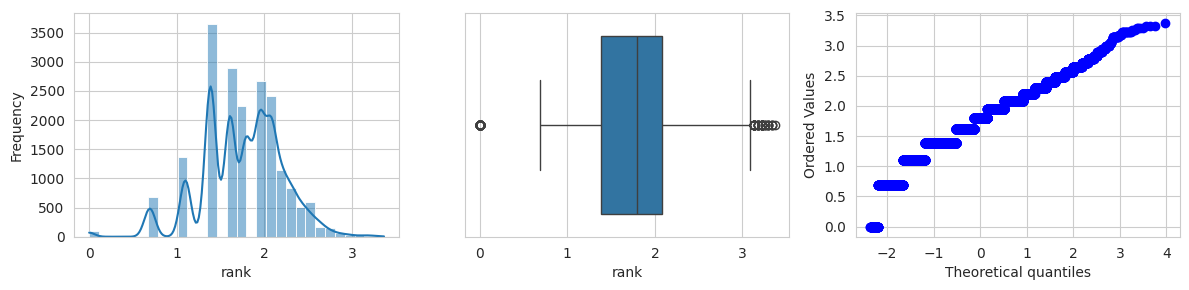




Observing original distributions after taking care of outliers
----------------------------------------------------------------------------------------------


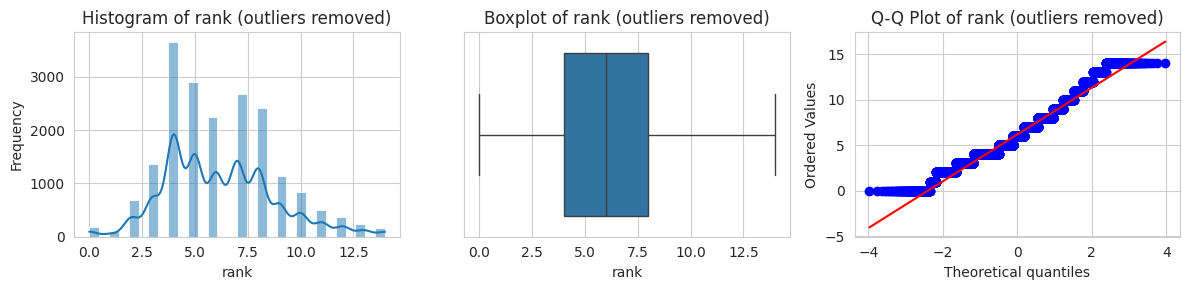




Observing log distributions after taking care of outliers
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


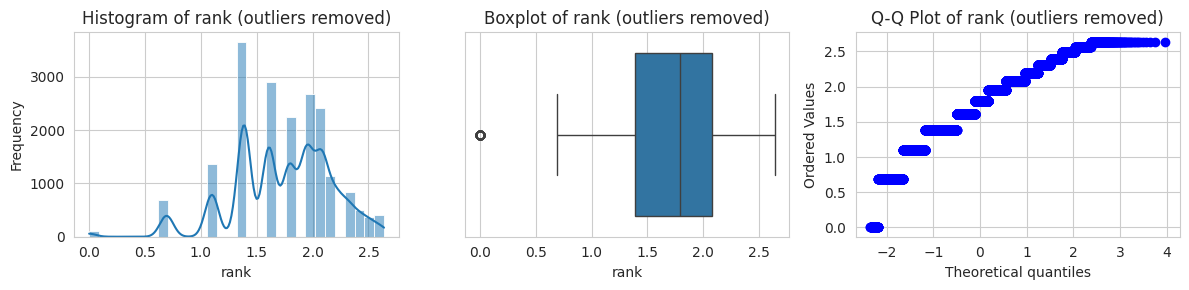

In [ ]:
column = 'rank'
df, formatted_stats = get_df_and_formatted_stats(column, as_int=True)
print()
visualize_column(df, column)

###### Exploring column `dependants_count`

Used, after taking care of outliers and taking log


To be used for triviality(inversely proportional)

       dependants_count
count      2.379200e+04
mean       1.685315e+05
std        1.914446e+06
min        0.000000e+00
25%        0.000000e+00
50%        1.000000e+00
75%        3.000000e+00
max        3.255365e+07

Observing original distributions
----------------------------------------------------------------------------------------------


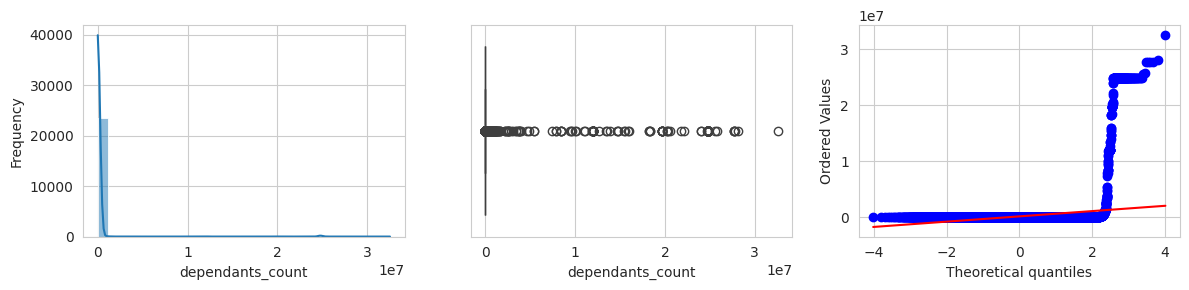




Observing log distributions
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


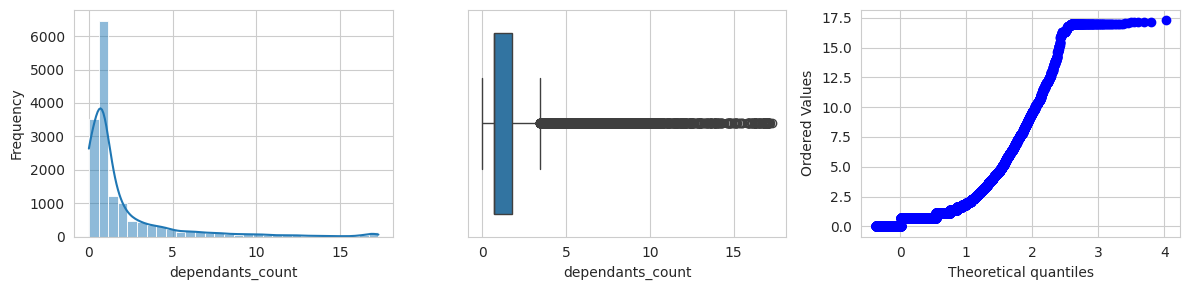




Observing original distributions after taking care of outliers
----------------------------------------------------------------------------------------------


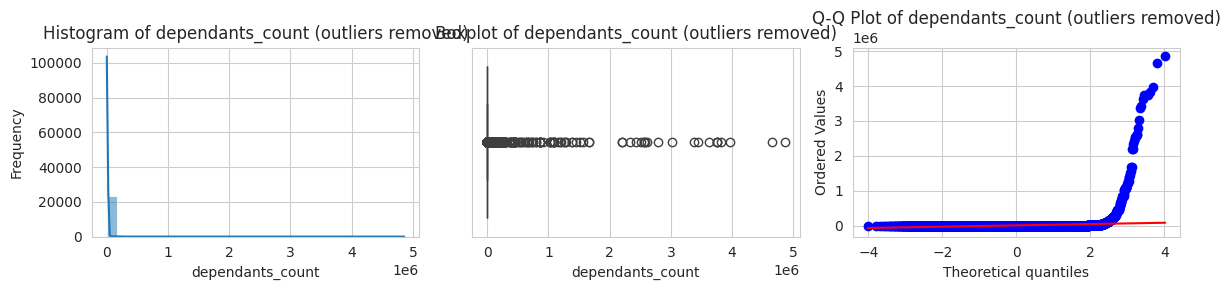




Observing log distributions after taking care of outliers
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


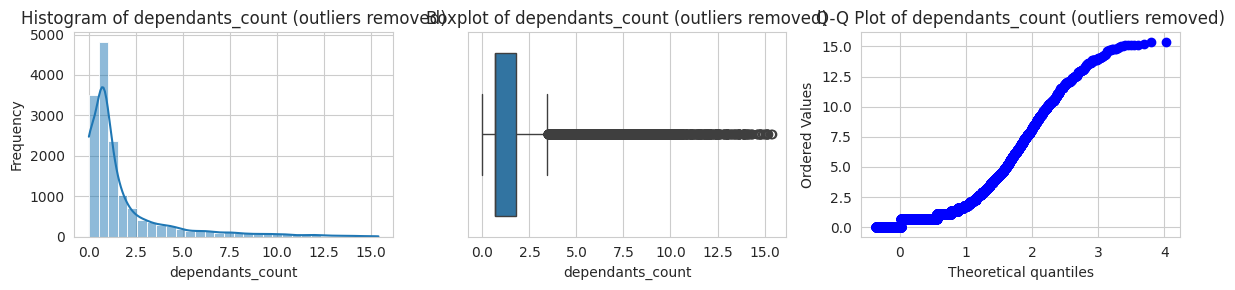

In [ ]:
column = 'dependants_count'
df, formatted_stats = get_df_and_formatted_stats(column, as_int=True)
print()
visualize_column(df, column)

###### Exploring column `dependant_repos_count`

Used, after taking care of outliers and taking log

To be used for triviality, inversely proportional

       dependant_repos_count
count           23133.000000
mean             2111.226343
std             26798.679720
min                 0.000000
25%                 0.000000
50%                 2.000000
75%                 3.000000
max            684593.000000

Observing original distributions
----------------------------------------------------------------------------------------------


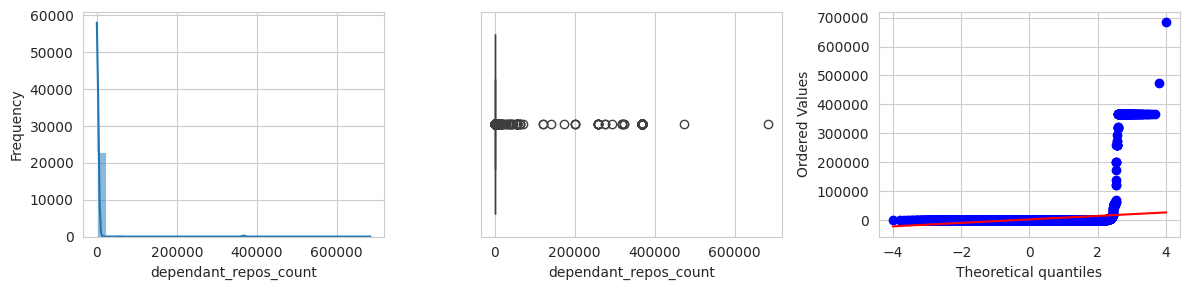




Observing log distributions
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


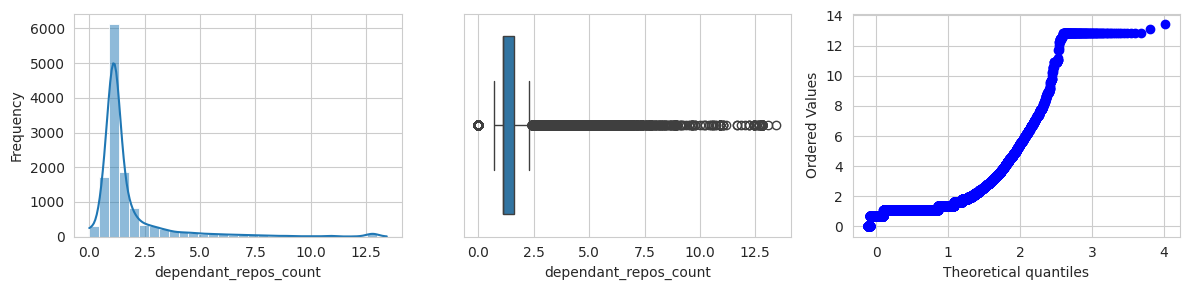




Observing original distributions after taking care of outliers
----------------------------------------------------------------------------------------------


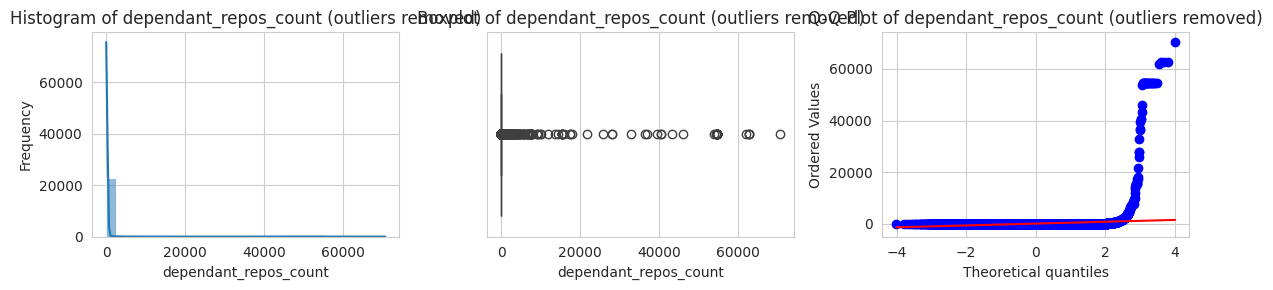




Observing log distributions after taking care of outliers
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


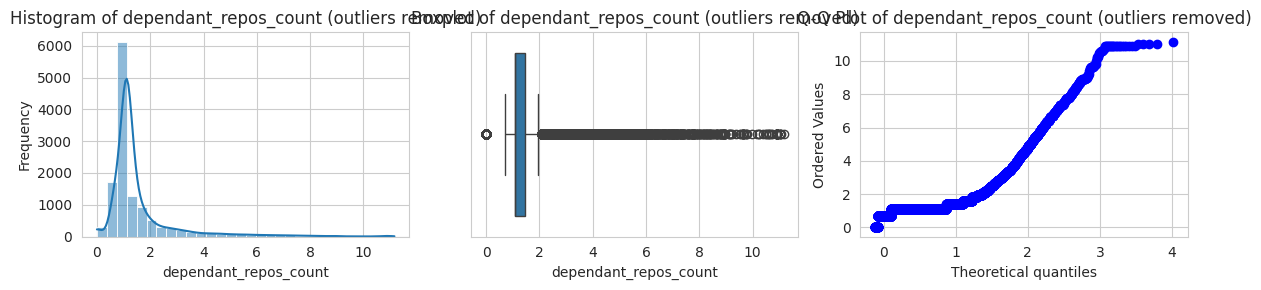

In [ ]:
column = 'dependant_repos_count'
df, formatted_stats = get_df_and_formatted_stats(column, as_int=True)
print()
visualize_column(df, column)

###### Exploring column `forks`
Used, after taking care of outliers and taking log

To be used for activity, triviality

              forks
count  13450.000000
mean     413.563271
std     3121.219363
min        0.000000
25%        0.000000
50%        0.000000
75%        5.000000
max    78304.000000

Observing original distributions
----------------------------------------------------------------------------------------------


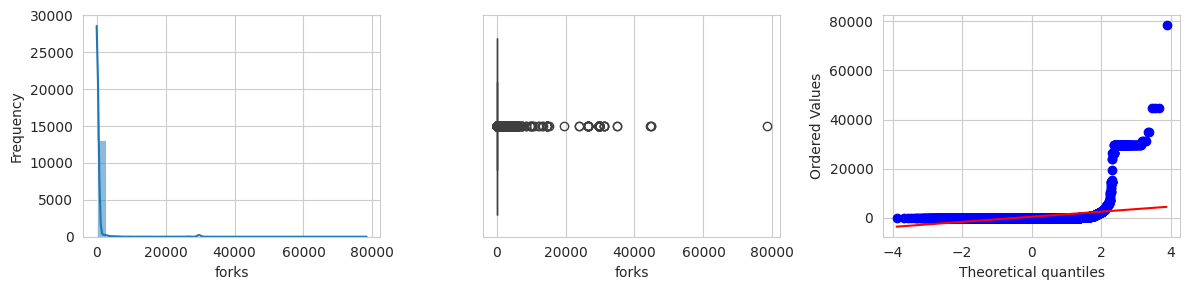




Observing log distributions
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


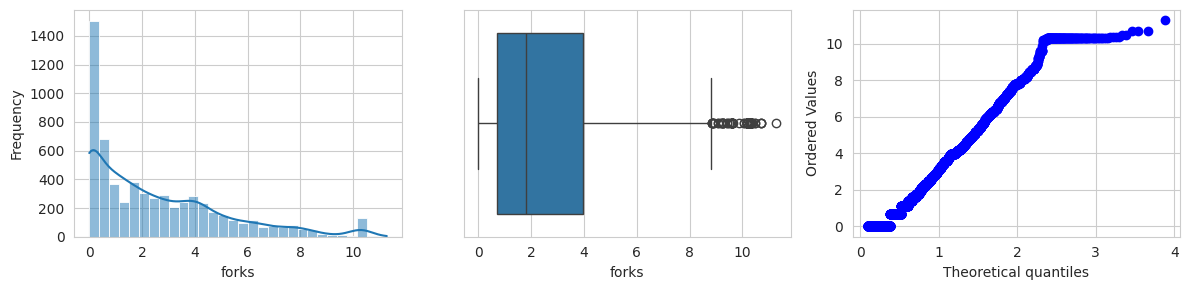




Observing original distributions after taking care of outliers
----------------------------------------------------------------------------------------------


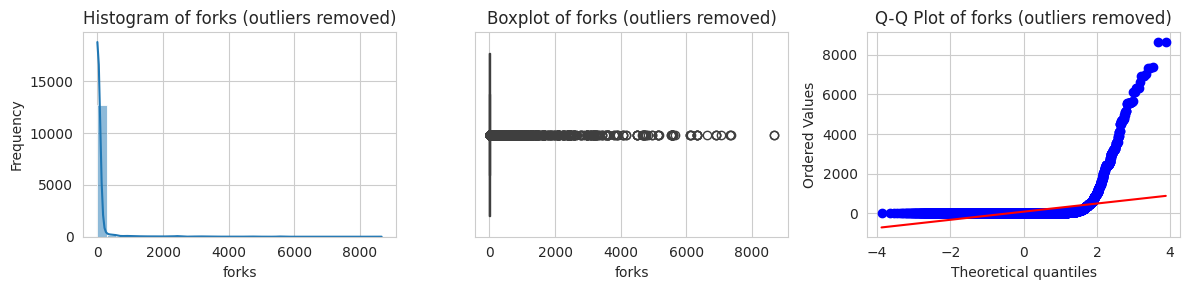




Observing log distributions after taking care of outliers
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


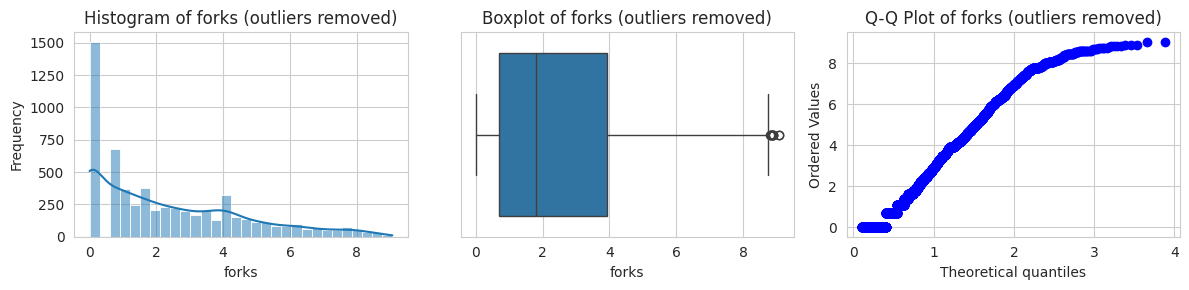

In [ ]:
column = 'forks'
df, formatted_stats = get_df_and_formatted_stats(column, as_int=True)
print()
visualize_column(df, column)

###### Exploring column `stars`

Used, after taking care of outliers and taking log

To be used for triviality

               stars
count   13450.000000
mean     1301.388625
std      8015.661270
min         0.000000
25%         0.000000
50%         2.000000
75%        17.000000
max    219584.000000

Observing original distributions
----------------------------------------------------------------------------------------------


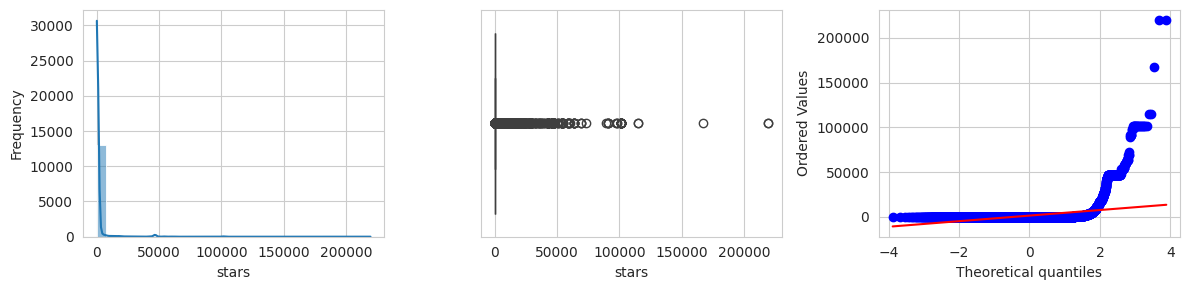




Observing log distributions
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


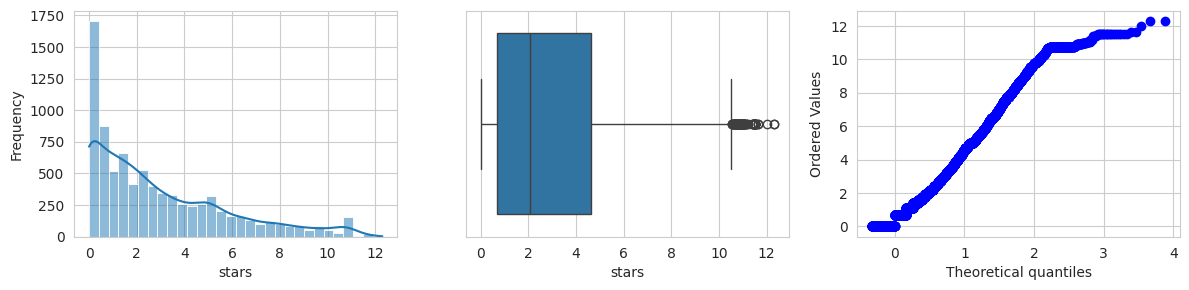




Observing original distributions after taking care of outliers
----------------------------------------------------------------------------------------------


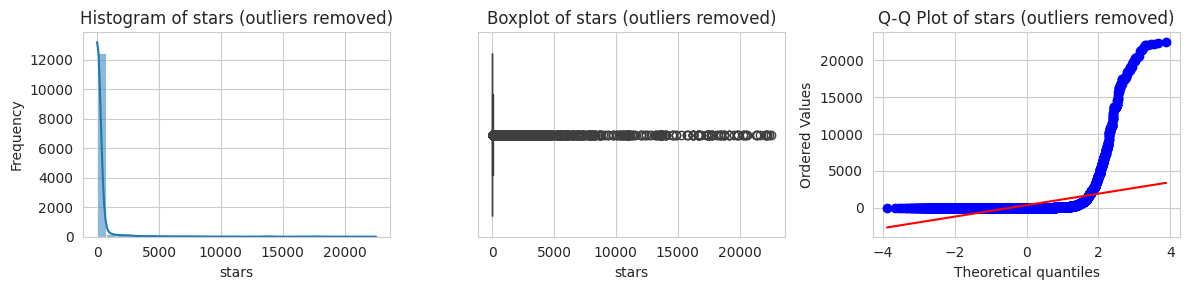




Observing log distributions after taking care of outliers
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


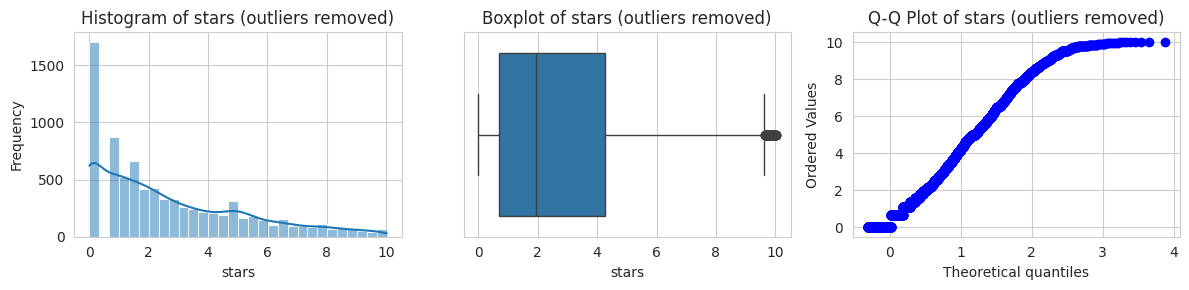

In [ ]:
column = 'stars'
df, formatted_stats = get_df_and_formatted_stats(column, as_int=True)
print()
visualize_column(df, column)

###### Exploring column `watchers`

Used, after taking care of outliers and taking log

To be used for triviality

           watchers
count  13450.000000
mean      26.990781
std      169.916417
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max     6778.000000

Observing original distributions
----------------------------------------------------------------------------------------------


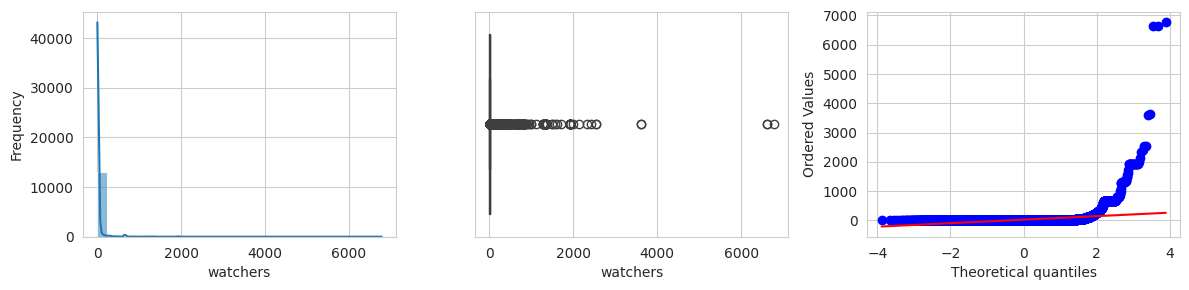




Observing log distributions
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


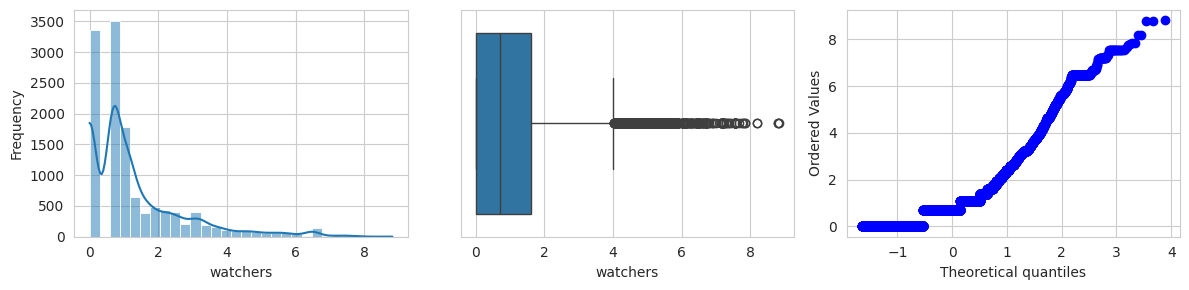




Observing original distributions after taking care of outliers
----------------------------------------------------------------------------------------------


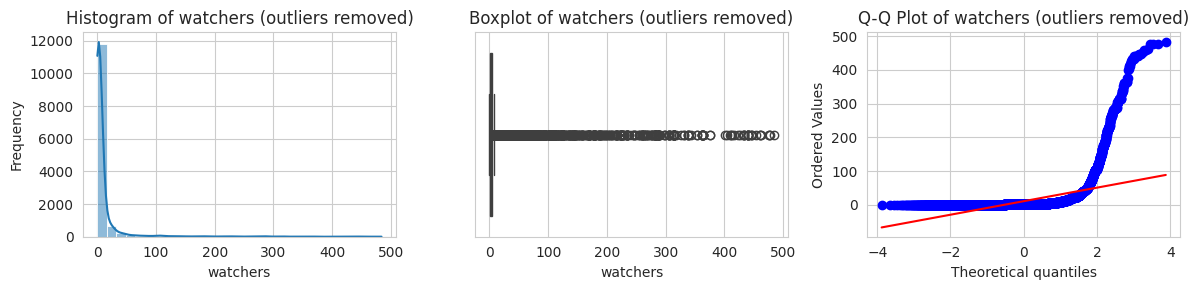




Observing log distributions after taking care of outliers
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


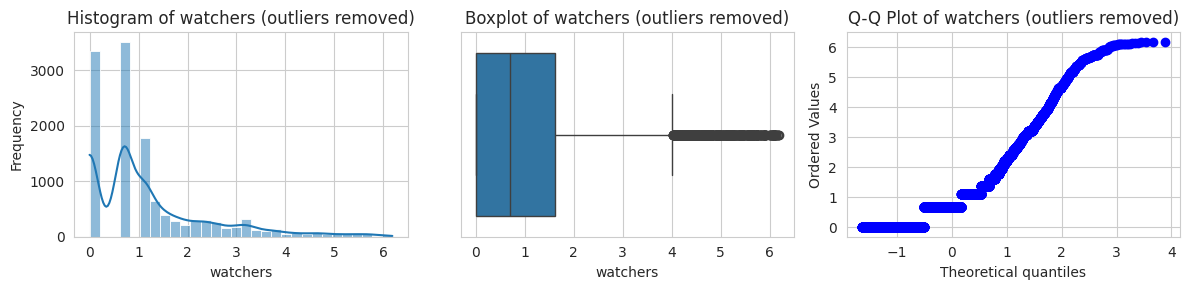

In [ ]:
column = 'watchers'
df, formatted_stats = get_df_and_formatted_stats(column, as_int=True)
print()
visualize_column(df, column)

###### Exploring column `issues`

Used, after taking care of outliers

To be used for triviality, activity

             issues
count  13450.000000
mean      29.689071
std      185.606321
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max     5563.000000

Observing original distributions
----------------------------------------------------------------------------------------------


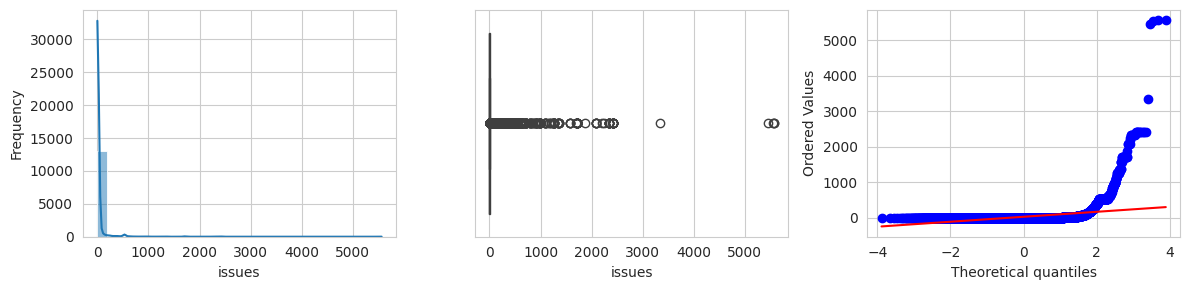




Observing log distributions
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


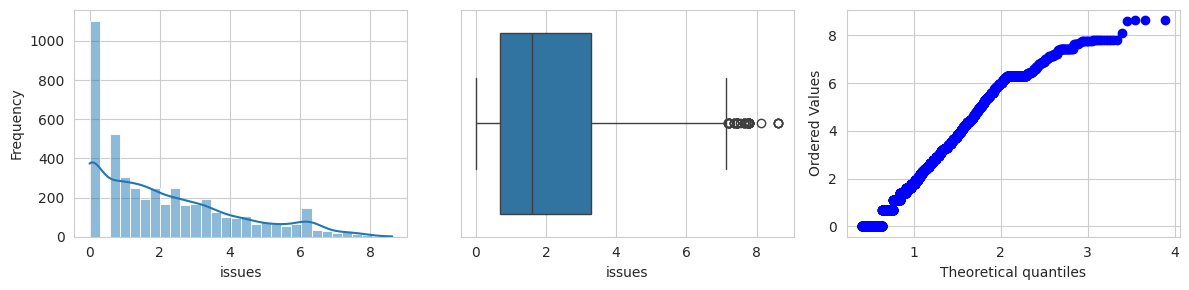




Observing original distributions after taking care of outliers
----------------------------------------------------------------------------------------------


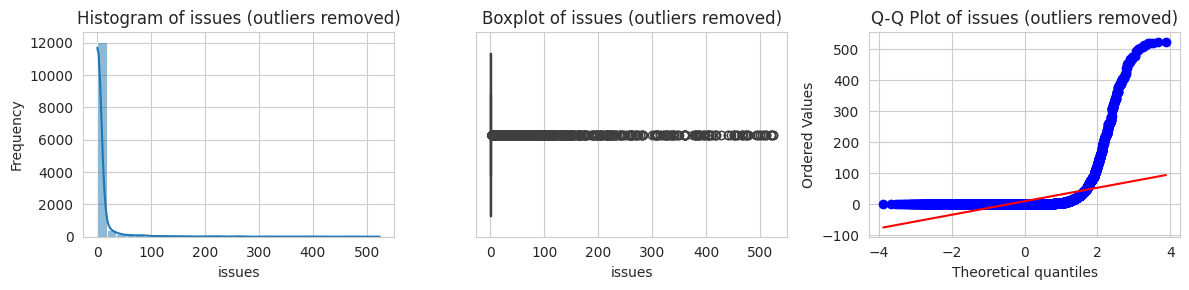




Observing log distributions after taking care of outliers
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


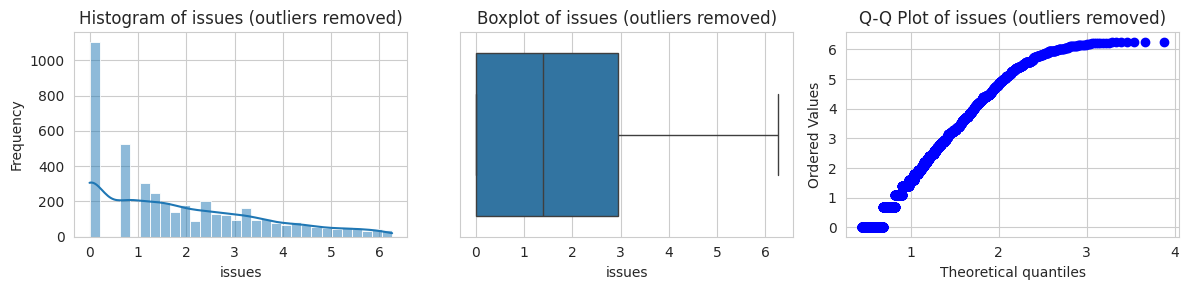

In [ ]:
column = 'issues'
df, formatted_stats = get_df_and_formatted_stats(column, as_int=True)
print()
visualize_column(df, column)

###### Exploring column `pr`

Used, after taking care of outliers and taking log

To be used for triviality, activity

                 pr
count  13450.000000
mean       6.899331
std       31.273966
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max     1085.000000

Observing original distributions
----------------------------------------------------------------------------------------------


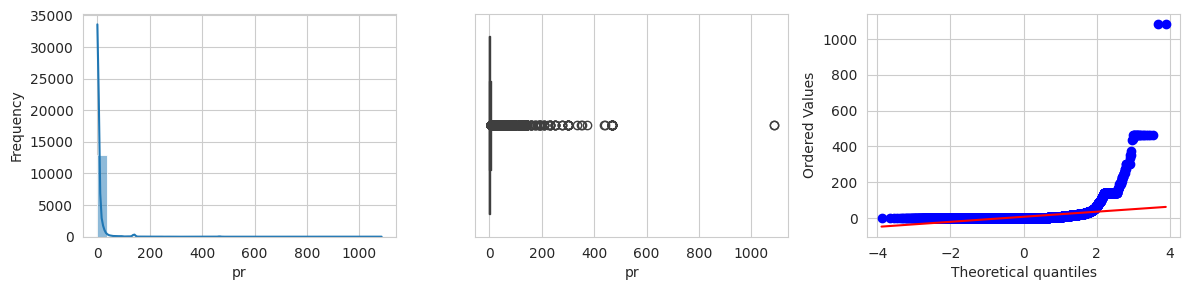




Observing log distributions
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


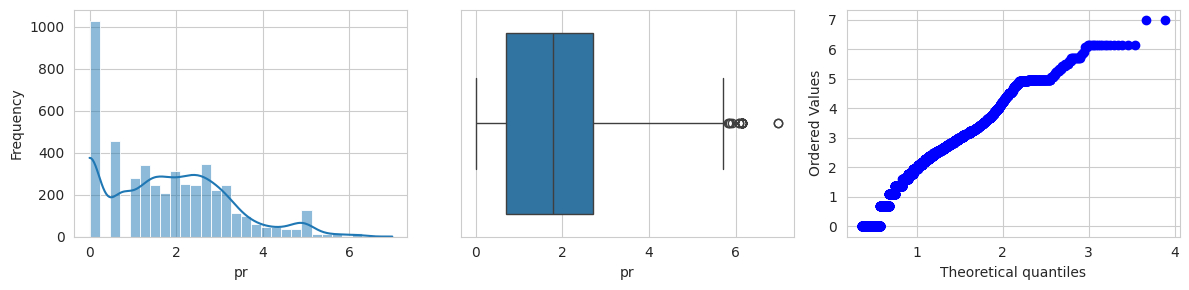




Observing original distributions after taking care of outliers
----------------------------------------------------------------------------------------------


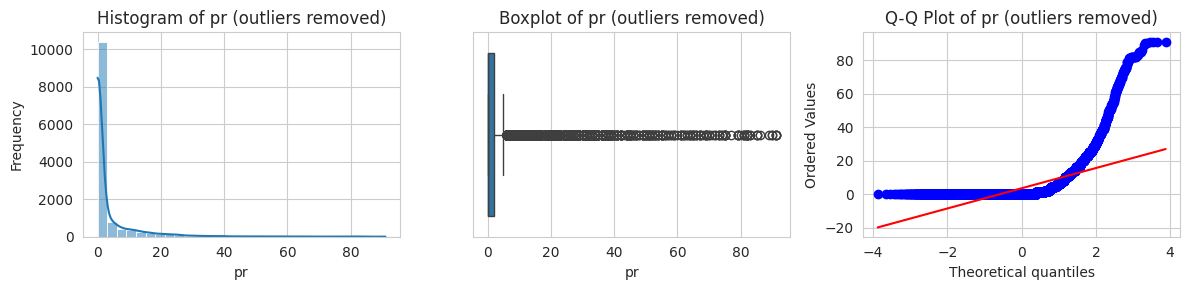




Observing log distributions after taking care of outliers
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


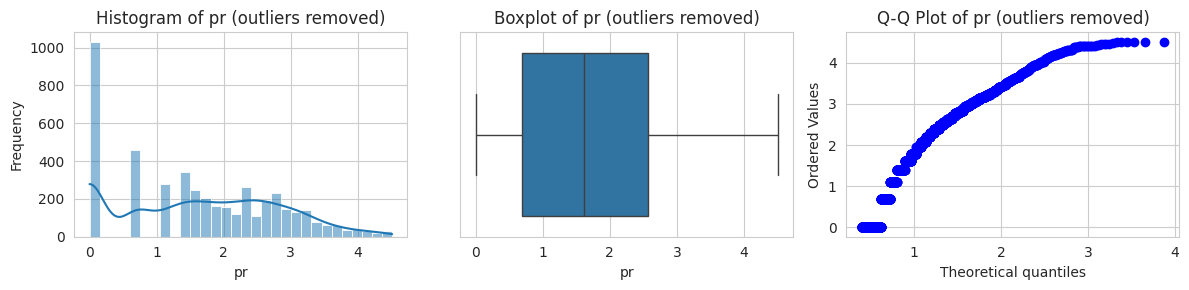

In [ ]:
column = 'pr'
df, formatted_stats = get_df_and_formatted_stats(column, as_int=True)
print()
visualize_column(df, column)

###### Exploring column `contributors`
Used, after taking care of outliers and taking log

To be used for triviality, activity

       contributors
count  13405.000000
mean     158.292279
std     1514.644136
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max    16979.000000

Observing original distributions
----------------------------------------------------------------------------------------------


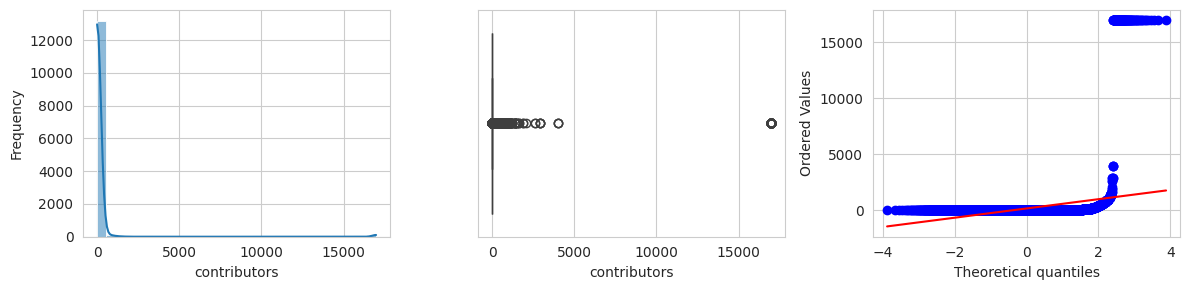




Observing log distributions
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


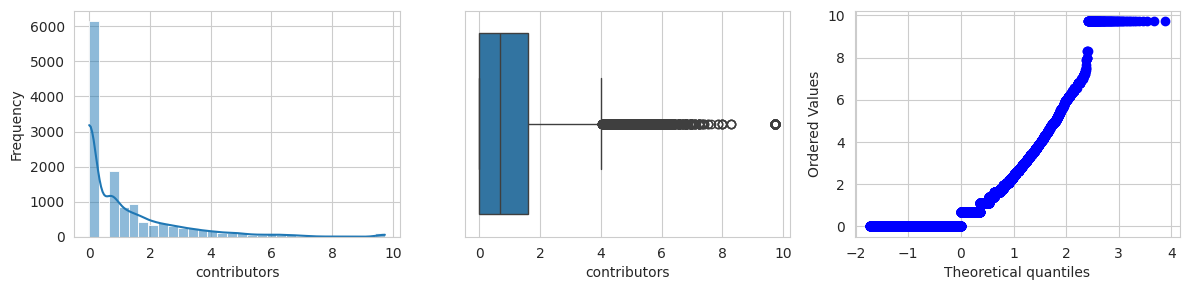




Observing original distributions after taking care of outliers
----------------------------------------------------------------------------------------------


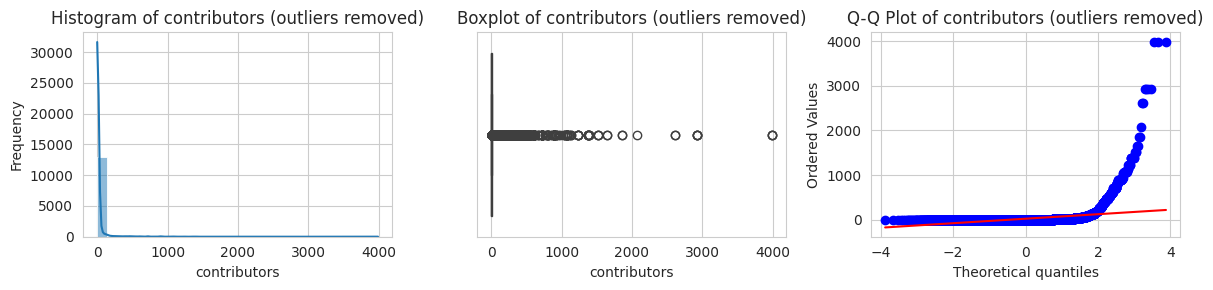




Observing log distributions after taking care of outliers
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


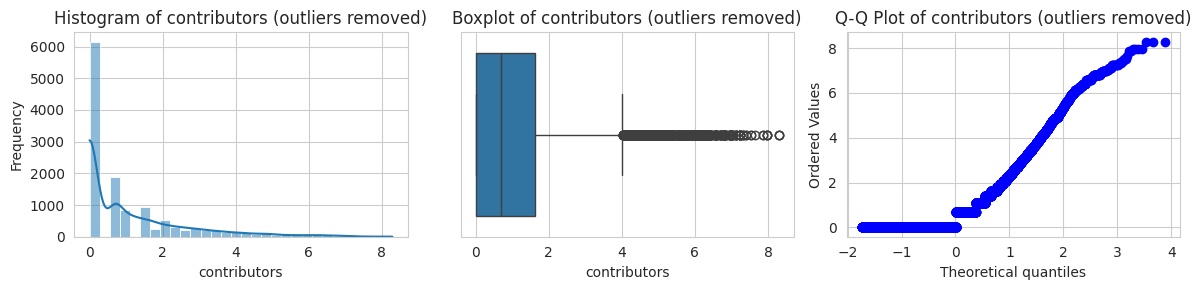

In [ ]:
column = 'contributors'
df, formatted_stats = get_df_and_formatted_stats(column, as_int=True)
print()
visualize_column(df, column)

###### Exploring column `no_of_commits`

Used, after taking care of outliers

To be used for triviality, activity

       no_of_commits
count   13406.000000
mean     1278.800985
std      8180.503491
min         1.000000
25%        10.000000
50%        33.000000
75%       156.000000
max    110663.000000

Observing original distributions
----------------------------------------------------------------------------------------------


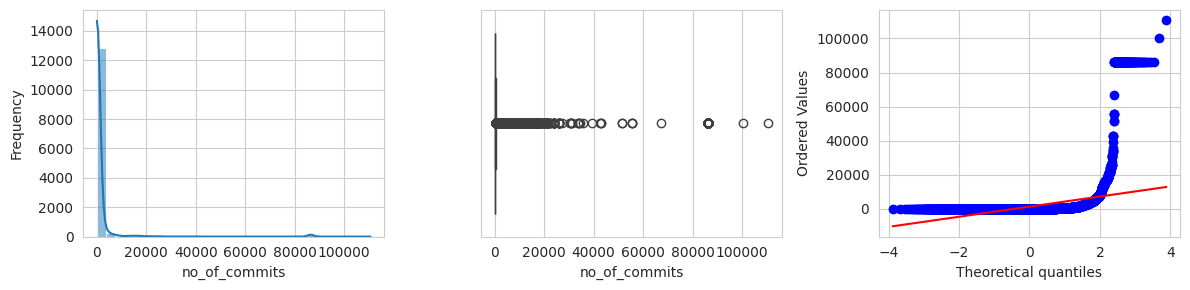




Observing log distributions
----------------------------------------------------------------------------------------------


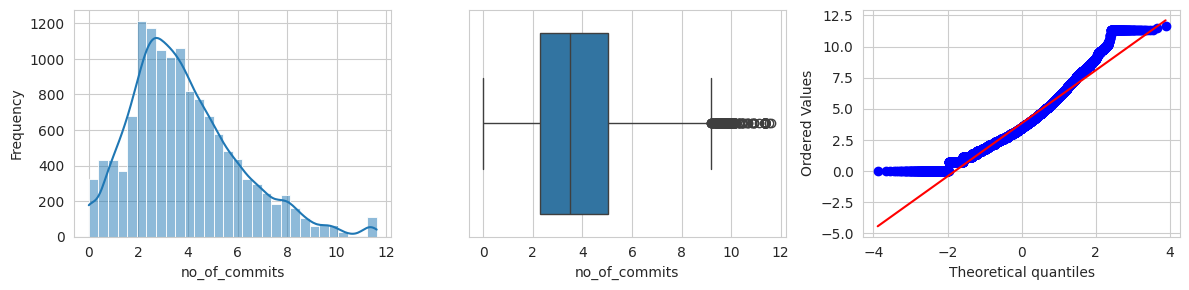




Observing original distributions after taking care of outliers
----------------------------------------------------------------------------------------------


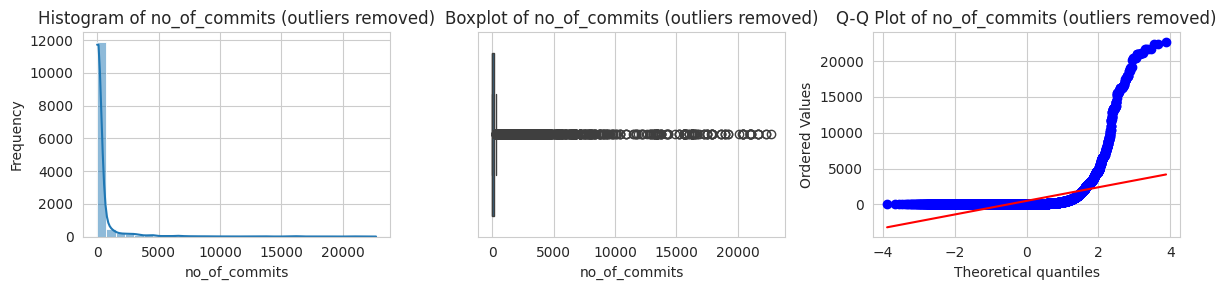




Observing log distributions after taking care of outliers
----------------------------------------------------------------------------------------------


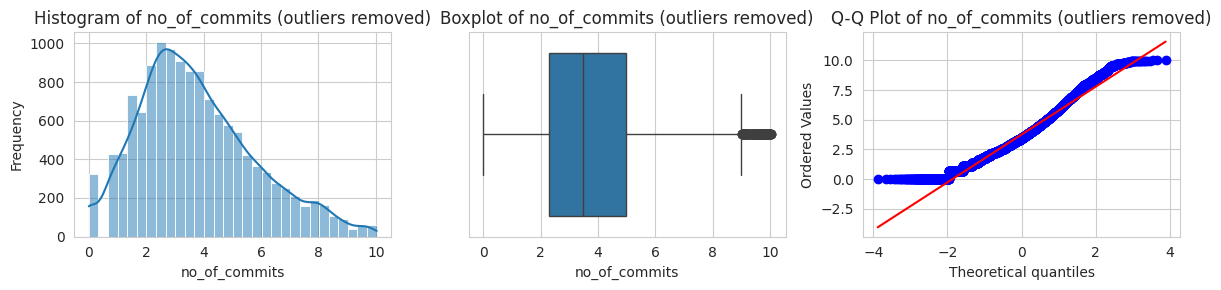

In [ ]:
column = 'no_of_commits'
df, formatted_stats = get_df_and_formatted_stats(column, as_int=True)
print()
visualize_column(df, column)

# Adding finalized columns to new table `package_metrics`

In [ ]:
def add_column_if_not_exists(cursor, table_name, column_name, column_definition):
  # check if the column already exists
  cursor.execute(f"PRAGMA table_info({table_name});")
  existing_columns = [column[1] for column in cursor.fetchall()]

  if column_name not in existing_columns:
    # add the column if it does not exist
    cursor.execute(f"ALTER TABLE {table_name} ADD COLUMN {column_name} {column_definition};")

In [ ]:
conn = sqlite3.connect("final_database.db")
cursor = conn.cursor()
cursor.execute("""
    CREATE TABLE IF NOT EXISTS package_metrics (
        package TEXT
    )
""")

conn.commit()

In [ ]:
with open('columns_to_consider.txt', "r") as file:
  columns_to_consider = file.read()

columns_to_consider = json.loads(columns_to_consider)
n_cols = len(columns_to_consider)

# columns other than `package`
columns = [[metric, 'TEXT DEFAULT NULL'] for metric in columns_to_consider]

# adding columns to the table
for col in columns:
  add_column_if_not_exists(cursor, 'package_metrics', col[0], col[1])

conn.commit()
sql_query = """
    INSERT INTO package_metrics (package)
    SELECT p.package
    FROM package_data p
    LEFT JOIN package_metrics m ON p.package = m.package
    WHERE m.package IS NULL
"""
cursor.execute(sql_query)
conn.commit()
pd.read_sql_query(f"SELECT * FROM package_metrics", conn)

,package,rank,dependants_count,dependant_repos_count,forks,stars,watchers,issues,pr,contributors,...,total_lines_of_code,sloc,no_of_files,health_score,security_numeric,popularity_numeric,maintenance_numeric,community_numeric,days_since_last_modification,is_deprecated
0,@gerrico/react-components,None,1.09861228866811,1.09861228866811,0.0,0.0,0.0,0,0.0,0.0,...,7.39756153552405,7.38025578842646,None,30,50,20,5,20,559,0
1,express-simple-app-generator,6,0.0,0.0,None,None,None,None,None,None,...,None,None,None,54,100,20,50,20,149,0
2,generator-giraffe,10,0.0,1.09861228866811,0.0,0.693147180559945,0.0,0,0.0,0.0,...,8.23615566168312,7.19443685110033,None,36,50,20,5,20,614,0
3,outdated-client,3,0.693147180559945,0.0,None,None,None,None,None,None,...,None,None,None,28,50,20,5,20,651,0
4,@semi-bot/semi-theme-shopify,None,None,None,None,None,None,None,None,None,...,None,None,None,40,100,20,5,20,561,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,haribotify,10,1.6094379124341,0.0,None,None,None,None,None,None,...,None,None,None,42,100,20,5,20,614,0
29996,eslint-config-sharecar,7,0.0,1.38629436111989,0.0,0.0,0.0,0,0.0,0.0,...,7.44541755670169,1.94591014905531,None,42,100,20,5,20,615,0
29997,webpack-to-ardoq,4,0.0,0.0,None,None,None,None,None,None,...,None,None,None,40,50,10,5,20,134,0
29998,zywave-content-search,3,0.0,0.0,None,None,None,None,None,None,...,None,None,None,28,50,20,5,20,638,0


In [ ]:
def update_column_data(column, outliers_removed = False, take_log = False):
  df = get_df(f"SELECT package, {column} FROM package_data WHERE {column} IS NOT NULL")
  df[column] = df[column].astype(float)

  if outliers_removed:
    z_scores = stats.zscore(df[column])
    threshold = 2.7
    df = df[(abs(z_scores) < threshold)]

  if take_log:
    df[column] = np.where(df[column] > 0, np.log(df[column]), np.log1p(df[column]))

  df.to_sql('temp_table', conn, if_exists='replace', index=False)

  cursor.execute("""
      UPDATE package_metrics
      SET {column} = t.{column}
      FROM temp_table AS t
      WHERE package_metrics.package = t.package
  """.format(column=column))
  conn.commit()

In [ ]:
update_column_data('rank', outliers_removed = False, take_log = False)

In [ ]:
update_column_data('dependants_count', outliers_removed = True, take_log = True)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
update_column_data('dependant_repos_count', outliers_removed = True, take_log = True)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
update_column_data('forks', outliers_removed = True, take_log = True)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
update_column_data('stars', outliers_removed = True, take_log = True)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
update_column_data('watchers', outliers_removed = True, take_log = True)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
update_column_data('issues', outliers_removed = True, take_log = False)

In [ ]:
update_column_data('pr', outliers_removed = True, take_log = True)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
update_column_data('contributors', outliers_removed = True, take_log = True)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
update_column_data('no_of_commits', outliers_removed = True, take_log = False)

In [ ]:
conn.close()